# [作業目標]
對資料做更多處理 : 顯示特定欄位的統計值與直方圖
# [作業重點]
試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = "D:\shiang\MyCode\Github\data\HW008"


f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# 練習時間
觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息

# Eg
計算任意欄位的平均數及標準差
畫出任意欄位的直方圖 

### 確認 data 的 基本資訊

In [101]:
# data shape
print(app_train.shape)


(307511, 122)


### 定義檢查資料類型的 Function

In [102]:
# check data type
def inspect_data_type(df):
    dtype_df = df.dtypes.reset_index()
    dtype_df.columns = ["Count", "Column Type"]
    dtype_df = dtype_df.groupby("Column Type").aggregate('count').reset_index()
    return dtype_df


### 執行定義好的 Function，確認 Data 個欄位的資料格式

In [103]:
inspect_data_type(app_train)


,Column Type,Count
0,int64,41
1,float64,65
2,object,16


### 找出 int/floae type 的欄位(比較適合計算統計量跟畫直方圖)

In [35]:
# Get colum where data type is floa or int
int_features = []
float_features = []
for dtype, feature in zip(app_train.dtypes,app_train.columns):
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)


### 確認 int type 的欄有幾種數字類別

In [98]:
### 挑選適合的 Coulun 來畫直方圖
# for col in app_train[float_features].columns:
#     print(col)
#app_train[int_features].head()
app_train[int_features].nunique()

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMEN

"HOUR_APPR_PROCESS_START" 欄位的數值有24個種類，看起來較適合畫直方圖
--> 以該欄位來計算 Mean/Stdev 以及畫直方圖

### 計算 Mean 跟 Stdev

In [107]:
### AMT_INCOME_TOTAL 欄位的 mean & stdev
target_inf = {'Column Name':["HOUR_APPR_PROCESS_START"],'Mean':[df_tmp.mean()],'Stdev':[df_tmp.std()]}
answer = pd.DataFrame.from_dict(target_inf)
answer

,Column Name,Mean,Stdev
0,HOUR_APPR_PROCESS_START,12.063419,3.265832


### 畫直方圖
方法一 (使用 pandas 內建 hist)

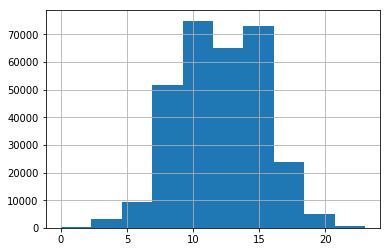

In [93]:
df_tmp = app_train["HOUR_APPR_PROCESS_START"]
df_tmp.hist()

方法二 (使用matplotlib)

(array([  431.,  3320.,  9480., 51642., 74951., 65192., 72906., 23949.,
         5044.,   596.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

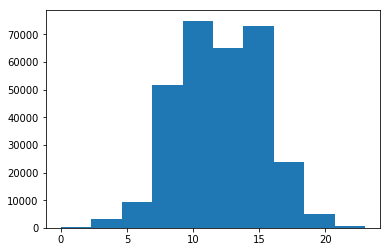

In [99]:
#plt.hist(app_train[float_features[0]],bin=range(20000,120000000,10000000))
plt.hist(df_tmp)